In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

C:\Users\aneesh\AppData\Local\Temp\ipykernel_6664\1437684206.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
d1=pd.read_csv('predictive_maintenance.csv')
d1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


<Axes: >

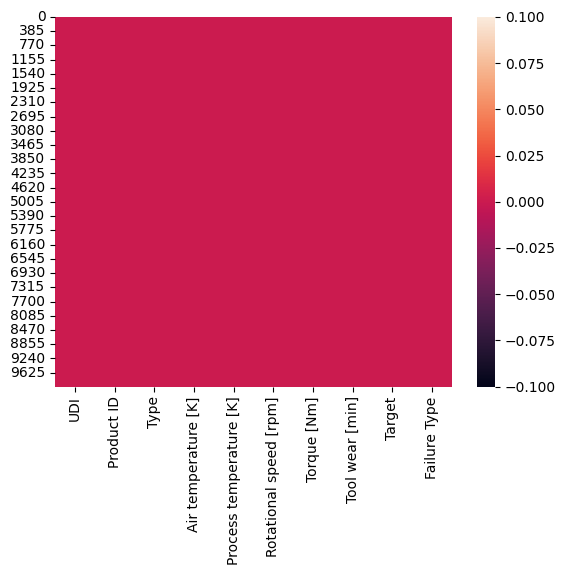

In [3]:
d1.shape
sns.heatmap(d1.isnull())

In [4]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
lb2=LabelEncoder()
lb3=LabelEncoder()
d1['PID']=lb1.fit_transform(d1['Product ID'])
d1['type']=lb2.fit_transform(d1['Type'])
o2=lb2.inverse_transform([0,1,2])
d1['Failure type']=lb3.fit_transform(d1['Failure Type'])
o3=lb3.inverse_transform([0,1,2,3,4,5])
print(o2)
print(o3)

['H' 'L' 'M']
['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure' 'Random Failures' 'Tool Wear Failure']


In [5]:
d1.drop(['Product ID','Type','PID','Failure Type','UDI','Target'],axis=1,inplace=True)
d1.tail(60)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],type,Failure type
9940,298.3,308.1,1722,28.6,89,2,1
9941,298.4,308.1,1395,44.0,92,1,1
9942,298.4,308.1,1375,50.8,94,1,1
9943,298.3,308.0,1766,26.0,96,2,1
9944,298.3,307.9,1399,47.8,99,1,1
9945,298.3,308.0,1578,37.8,101,1,1
9946,298.3,307.9,1502,42.0,103,1,1
9947,298.2,307.9,1529,36.6,105,2,1
9948,298.2,307.8,1804,25.1,108,1,1
9949,298.2,307.8,1411,53.4,110,2,1


In [6]:
d1_numeric = d1.apply(pd.to_numeric, errors='coerce')
d=d1_numeric.dropna()
d2=d.head(500)
d2.corr()["Failure type"]

Air temperature [K]        0.034519
Process temperature [K]   -0.005853
Rotational speed [rpm]     0.215038
Torque [Nm]                0.050500
Tool wear [min]            0.079139
type                       0.012353
Failure type               1.000000
Name: Failure type, dtype: float64

<Axes: xlabel='Failure type', ylabel='count'>

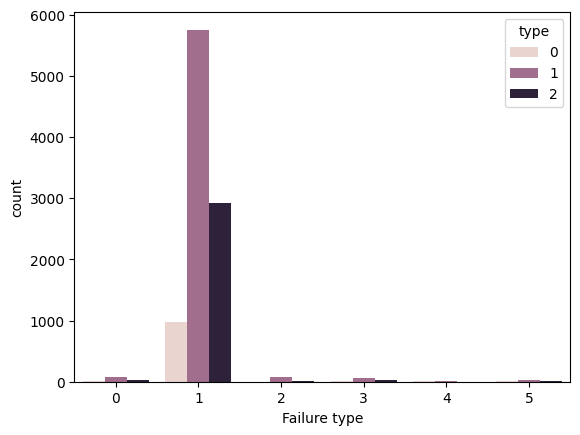

In [7]:
sns.countplot(x='Failure type',data=d,hue='type')

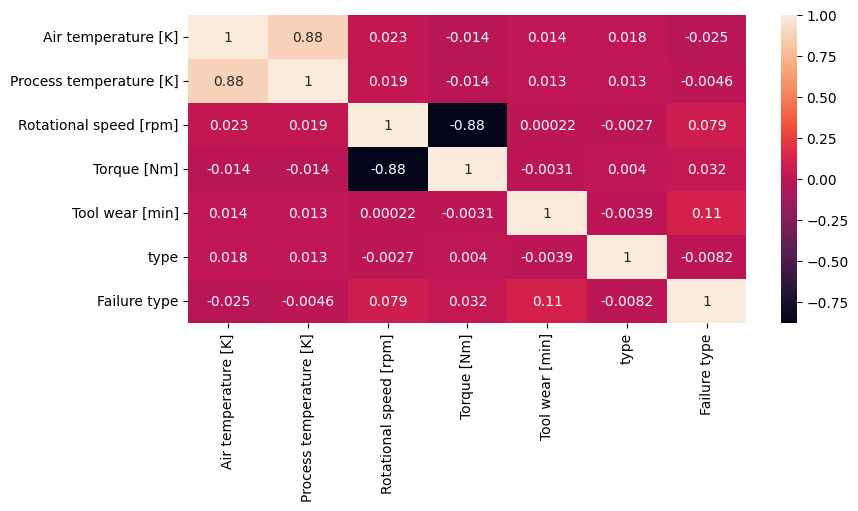

In [8]:
plt.figure(figsize=(9,4))
sns.heatmap(d.corr(),annot=True)
plt.draw()

<Axes: xlabel='Rotational speed [rpm]', ylabel='Air temperature [K]'>

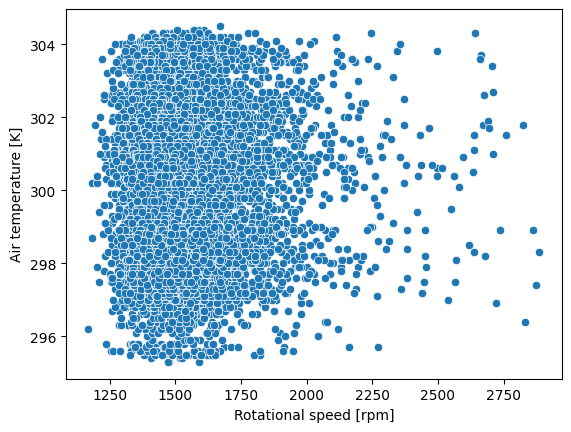

In [9]:
sns.scatterplot(x='Rotational speed [rpm]',y='Air temperature [K]', data=d)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=d[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','type']]
y=d['Failure type']

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=42) 
xtrain_scaled=sc.fit_transform(xtrain)
xtest_scaled=sc.transform(xtest)

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain_scaled,ytrain)

LogisticRegression()

In [13]:
p=lr.predict(xtest_scaled)
lb3.inverse_transform(p)

array(['No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Failure',
       'No Failure', 'No Failure', 'No Failure', 'No Fa

In [14]:
p1=lr.predict(sc.transform(np.array([[298.5,308.2,1444,40.5,170,1]])))
lb3.inverse_transform(p1)

C:\Users\aneesh\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['No Failure'], dtype=object)

In [15]:
p2=lr.predict(sc.transform(np.array([[289.6	,399.2,	1400,	40,180,	2]])))
lb3.inverse_transform(p2)

C:\Users\aneesh\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Overstrain Failure'], dtype=object)

In [16]:
from sklearn.metrics import mean_absolute_error,classification_report
e=mean_absolute_error(ytest,p)
e

0.05

In [17]:
print(classification_report(ytest,p))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.98      1.00      0.99       968
           2       0.33      0.14      0.20         7
           3       0.67      0.80      0.73         5
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6

    accuracy                           0.97      1000
   macro avg       0.50      0.38      0.40      1000
weighted avg       0.96      0.97      0.97      1000



C:\Users\aneesh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aneesh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aneesh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
d.describe()['Failure type']

count    10000.000000
mean         1.039000
std          0.379069
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Failure type, dtype: float64

In [19]:
import joblib
from tkinter import *

In [20]:
joblib.dump(lr, 'pm.joblib')

['pm.joblib']

In [21]:
root=Tk()
root.geometry('600x500')
root.minsize(300,200)
root.title('Predictive Maintenance')
root.configure(background='light blue')

In [22]:
x = Label(root, text="Maintenance Predictor", fg='dark slate gray', bg='light blue')
x.config(font=('Impact', 24))
x.grid(row=0, column=0, columnspan=3, pady=(5, 7))

airtemp = Label(root, text='Air temperature [K]', fg='black', bg='light blue')
airtemp.config(font=('Georgia', 12))
airtemp.grid(row=3, column=0, padx=(10, 10), pady=(10, 5),sticky='w')

# Air temperature entry widget
ati = Entry(root)
ati.grid(row=3, column=1, padx=(10, 10), pady=(10, 5))

# Space between labels
#label_space = Label(root, text=" ", bg='light blue')  # You can use other widgets or options for spacing
#label_space.pack(side='left', pady=(1, 5))

# Process temperature label
processtemp = Label(root, text='Process temperature [K]', fg='black', bg='light blue')
processtemp.config(font=('Georgia', 12))
processtemp.grid(row=6, column=0, padx=(10, 10), pady=(10, 5),sticky='w')

# Process temperature entry widget
pti = Entry(root)
pti.grid(row=6, column=1, padx=(10, 10), pady=(10, 5))

In [23]:
rpm = Label(root, text='Rotational speed [rpm]', fg='black', bg='light blue')
rpm.config(font=('Georgia', 12))
rpm.grid(row=9, column=0, padx=(10, 10), pady=(10, 5),sticky='w')

rsi = Entry(root)
rsi.grid(row=9, column=1, padx=(10, 10), pady=(10, 5))


In [24]:
t = Label(root, text='Torque [Nm]', fg='black', bg='light blue')
t.config(font=('Georgia', 12))
t.grid(row=12, column=0, padx=(5, 10), pady=(10, 5),sticky='w')

ti = Entry(root)
ti.grid(row=12, column=1, padx=(10, 10), pady=(10, 5))


In [25]:
tw = Label(root, text='Tool wear [min]', fg='black', bg='light blue')
tw.config(font=('Georgia', 12))
tw.grid(row=15, column=0, padx=(10, 10), pady=(10, 5),sticky='w')

twi = Entry(root)
twi.grid(row=15, column=1, padx=(10, 10), pady=(10, 5))

In [26]:
type = Label(root, text='type', fg='black', bg='light blue')
type.config(font=('Georgia', 12))
type.grid(row=18, column=0, padx=(10, 10), pady=(10, 5),sticky='w')

tpi = Entry(root)
tpi.grid(row=18, column=1, padx=(10, 10), pady=(10, 5))

In [27]:
def predict_failure():
        lr_model = joblib.load('pm.joblib')
        # Get input values from entry widgets
        air_temp = float(ati.get())
        process_temp = float(pti.get())
        r=float(rsi.get())
        trq=float(ti.get())
        twr=float(twi.get())
        tp=float(tpi.get())

        result=lb3.inverse_transform(lr_model.predict((sc.transform([[air_temp,process_temp,r,trq,twr,tp]]))))
        prediction_label=Label(root,text=f'Prediction: {result}',fg='black',bg='light blue')
        prediction_label.config(font=('Georgia',15))
        prediction_label.grid(row=25, column=1, columnspan=4, pady=(10, 20))
        
        #prediction_label.config(text=f' {result}')

In [28]:
button=Button(root,text='PREDICT',bg='light grey',fg='black',command=predict_failure)
button.config(font=('Times',12))
button.grid(row=23,column=1,columnspan=5,pady=(20,10))

In [29]:
root.mainloop()

In [30]:
#np.array([[289.6	,399.2,	1400,	40,180,	0	]]).nbytes
#import sys
#sys.getsizeof([[298.5,308.2,1444,40.5,170,1]])